In [49]:
import pandas as pd

# Load the dataset
file_path = 'SolarPrediction.csv'
solar_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
solar_data.head(), solar_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


(     UNIXTime                   Data      Time  Radiation  Temperature  \
 0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
 1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
 2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
 3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
 4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
 
    Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
 0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
 1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
 2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
 3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
 4     30.46        62                  104.95   5.62    06:13:00   18:13:00  ,
 None)

C:\Users\yunusyosaf\AppData\Local\Temp\ipykernel_18216\1003042206.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  solar_data['DateTime'] = pd.to_datetime(solar_data['Data'] + ' ' + solar_data['Time'], errors='coerce')


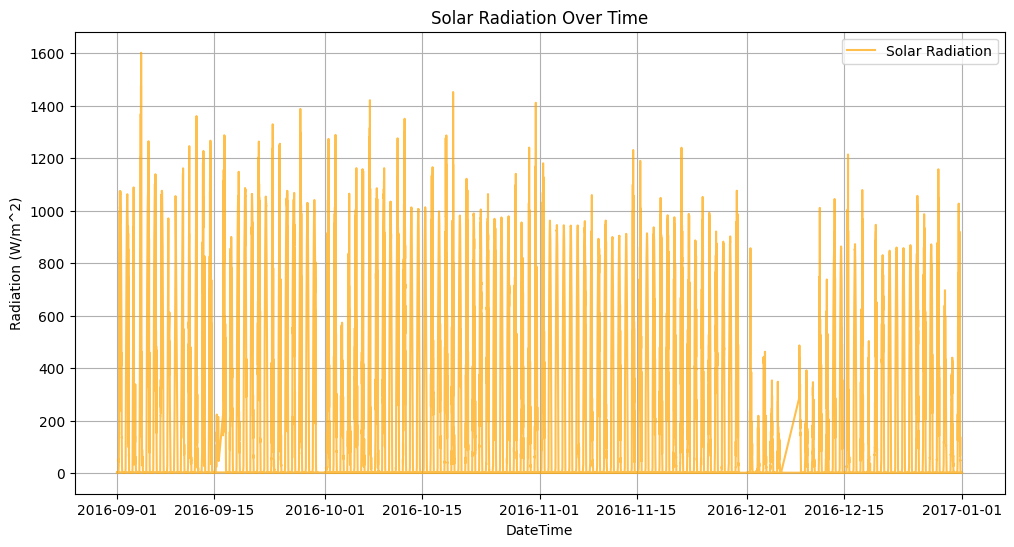

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Data' and 'Time' to a datetime format
solar_data['DateTime'] = pd.to_datetime(solar_data['Data'] + ' ' + solar_data['Time'], errors='coerce')

# Drop redundant columns (e.g., 'Data', 'Time', and keep 'DateTime')
solar_data = solar_data.drop(['Data', 'Time'], axis=1)

# Check for missing values
missing_values = solar_data.isnull().sum()

# Plot solar radiation over time
plt.figure(figsize=(12, 6))
plt.plot(solar_data['DateTime'], solar_data['Radiation'], label='Solar Radiation', color='orange', alpha=0.7)
plt.title('Solar Radiation Over Time')
plt.xlabel('DateTime')
plt.ylabel('Radiation (W/m^2)')
plt.legend()
plt.grid(True)
plt.show()



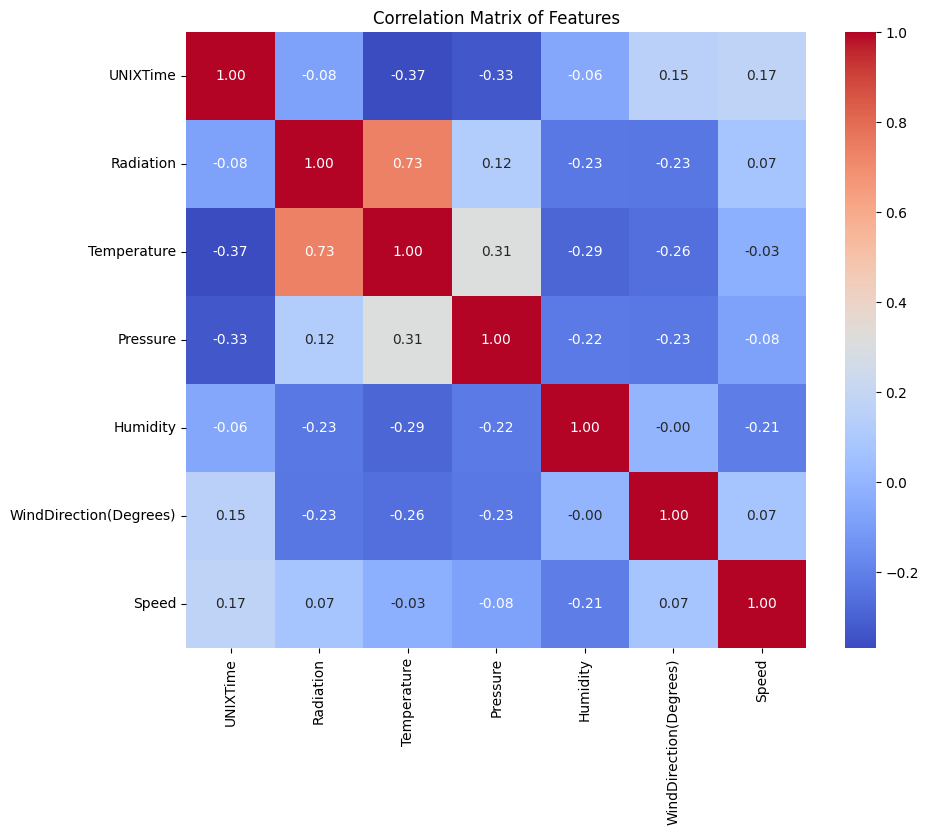

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update path as necessary)
file_path = 'SolarPrediction.csv'
solar_data = pd.read_csv(file_path)

# Convert 'Data' and 'Time' to datetime, specifying the format explicitly
try:
    solar_data['DateTime'] = pd.to_datetime(solar_data['Data'] + ' ' + solar_data['Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
except ValueError as e:
    print(f"Error in date parsing: {e}")

# Convert 'TimeSunRise' and 'TimeSunSet' to timedelta
solar_data['TimeSunRise'] = pd.to_timedelta(solar_data['TimeSunRise'], errors='coerce')
solar_data['TimeSunSet'] = pd.to_timedelta(solar_data['TimeSunSet'], errors='coerce')

# Drop non-numeric columns for correlation calculation
numeric_data = solar_data.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()


In [59]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Drop non-numeric columns
columns_to_drop = ['UNIXTime', 'DateTime', 'TimeSunRise', 'TimeSunSet']
solar_data_cleaned = solar_data.drop(columns=columns_to_drop, axis=1)

# Drop columns with all NaN values
solar_data_cleaned = solar_data_cleaned.dropna(axis=1, how='all')

# Select only numeric columns
solar_data_cleaned = solar_data_cleaned.select_dtypes(include=['float64', 'int64'])

# Normalize the data
scaler = MinMaxScaler()
solar_data_normalized = pd.DataFrame(
    scaler.fit_transform(solar_data_cleaned),
    columns=solar_data_cleaned.columns
)

# Save the normalized data for local use
solar_data_normalized.to_csv('Cleaned_Normalized_Solar_Data.csv', index=False)
print("Data normalization complete. Cleaned data saved as 'Cleaned_Normalized_Solar_Data.csv'.")


Data normalization complete. Cleaned data saved as 'Cleaned_Normalized_Solar_Data.csv'.


In [60]:
from sklearn.model_selection import train_test_split

# Load the cleaned normalized data
data = pd.read_csv('Cleaned_Normalized_Solar_Data.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['Radiation'])  # Drop target column
y = data['Radiation']  # Target variable

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split remaining 30%

# Save split data locally
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Data split into training, validation, and test sets. Files saved:")
print(" - X_train.csv, y_train.csv")
print(" - X_val.csv, y_val.csv")
print(" - X_test.csv, y_test.csv")


Data split into training, validation, and test sets. Files saved:
 - X_train.csv, y_train.csv
 - X_val.csv, y_val.csv
 - X_test.csv, y_test.csv


Epoch 1/100


C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0232 - mae: 0.1086 - val_loss: 0.0130 - val_mae: 0.0714
Epoch 2/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0145 - mae: 0.0781 - val_loss: 0.0143 - val_mae: 0.0682
Epoch 3/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0140 - mae: 0.0764 - val_loss: 0.0128 - val_mae: 0.0665
Epoch 4/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0137 - mae: 0.0746 - val_loss: 0.0126 - val_mae: 0.0676
Epoch 5/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0136 - mae: 0.0741 - val_loss: 0.0128 - val_mae: 0.0744
Epoch 6/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0135 - mae: 0.0742 - val_loss: 0.0126 - val_mae: 0.0662
Epoch 7/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0131 - mae: 0.0722 - val_loss: 0.0127 - val_mae: 0.0693
Epoch 8/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0128 - mae: 0.0716 - val_loss: 0.0125 - val_mae: 0.0693
Epoch 9/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

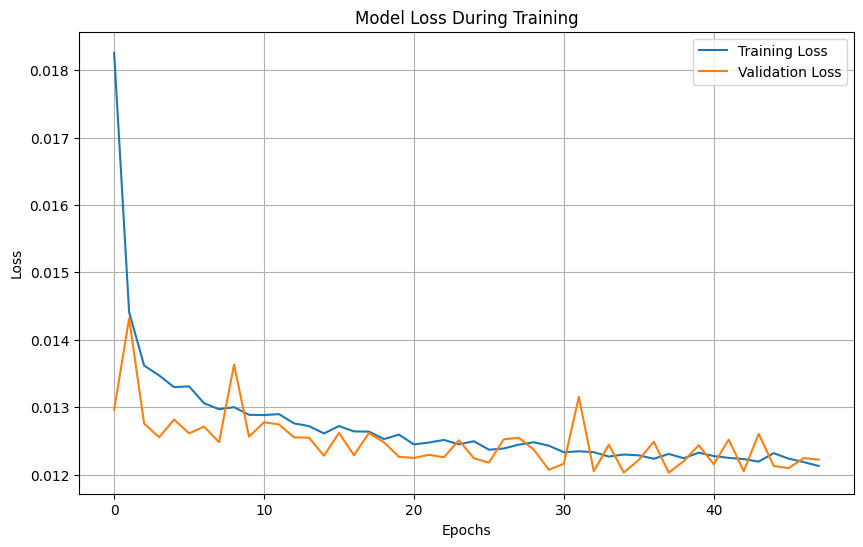

Model saved as 'solar_radiation_model.keras'


In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the split data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test MAE: {test_mae}")

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Save the model
# Save the model in the recommended format
model.save('solar_radiation_model.keras', save_format='keras')
print("Model saved as 'solar_radiation_model.keras'")


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  
Mean Absolute Error (MAE): 0.06596217920461626
Root Mean Squared Error (RMSE): 0.1081160050084192
R-Squared (R2): 0.6998824099484828


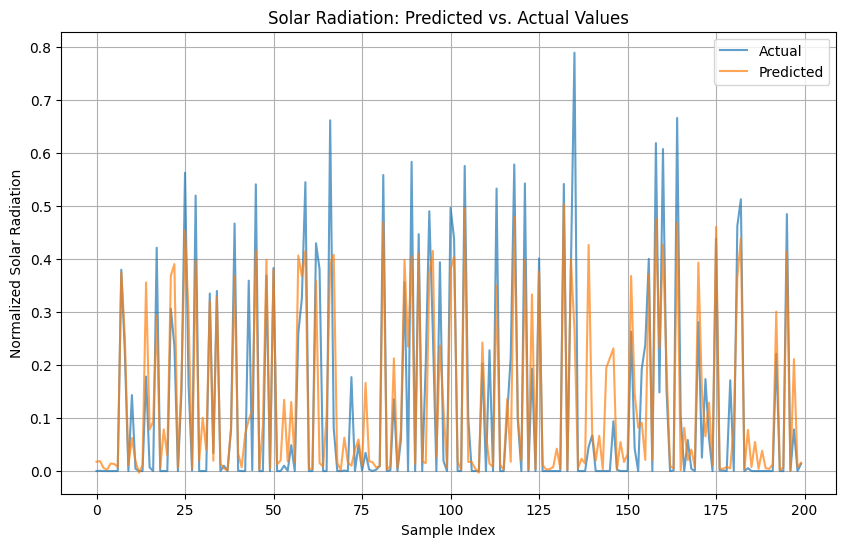

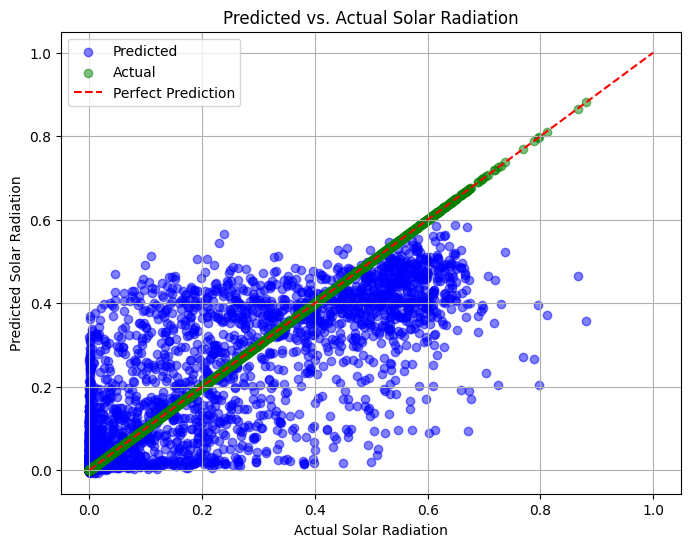

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Load the test data
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

# Load the saved model
model = tf.keras.models.load_model('solar_radiation_model.keras')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Reshape predictions and actual values if necessary
y_pred = np.squeeze(y_pred)  # Remove unnecessary dimensions
y_test = np.squeeze(y_test)

# Evaluate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")

# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test[:200], label='Actual', alpha=0.7)  # Limit to 200 samples for clarity
plt.plot(y_pred[:200], label='Predicted', alpha=0.7)
plt.title('Solar Radiation: Predicted vs. Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Solar Radiation')
plt.legend()
plt.grid()
plt.show()

# Scatter plot: Predicted vs. Actual with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='Predicted')  # Predicted values in blue
plt.scatter(y_test, y_test, c='green', alpha=0.5, label='Actual')    # Actual values in green
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Prediction')  # Perfect prediction line
plt.title('Predicted vs. Actual Solar Radiation')
plt.xlabel('Actual Solar Radiation')
plt.ylabel('Predicted Solar Radiation')
plt.legend()
plt.grid()
plt.show()



In [69]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define an improved model
improved_model = Sequential([
    Dense(128, kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.3),
    
    Dense(64, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.3),
    
    Dense(32, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.3),
    
    Dense(1)  # Single output for regression
])

# Use a learning rate scheduler
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9
)

# Compile the model with an improved optimizer and loss function
improved_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='mse',
    metrics=['mae']
)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_improved = improved_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the improved model
test_loss_improved, test_mae_improved = improved_model.evaluate(X_test, y_test, verbose=1)
print(f"Improved Test MAE: {test_mae_improved}")

# Save the improved model
improved_model.save('improved_solar_radiation_model.keras')


C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
358/358 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.8208 - mae: 0.5357 - val_loss: 0.7554 - val_mae: 0.1114
Epoch 2/200
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6586 - mae: 0.2082 - val_loss: 0.3001 - val_mae: 0.1026
Epoch 3/200
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2543 - mae: 0.1392 - val_loss: 0.1209 - val_mae: 0.1002
Epoch 4/200
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1020 - mae: 0.1096 - val_loss: 0.0550 - val_mae: 0.0939
Epoch 5/200
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0479 - mae: 0.0962 - val_loss: 0.0314 - val_mae: 0.0866
Epoch 6/200
358/358 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0273 - mae: 0.0885 - val_loss: 0.0203 - val_mae: 0.0846
Epoch 7/200
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0207 - mae: 0.0861 - val_loss: 0.0191 - val_mae: 0.0904
Epoch 8/200
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178 - mae: 0.0844 - val_loss: 0.0156 - val_mae: 0.0826
Epoch 9/200
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   
Improved MAE: 0.06821038117008026
Improved RMSE: 0.10910165617623727
Improved R-Squared: 0.6943853579510718


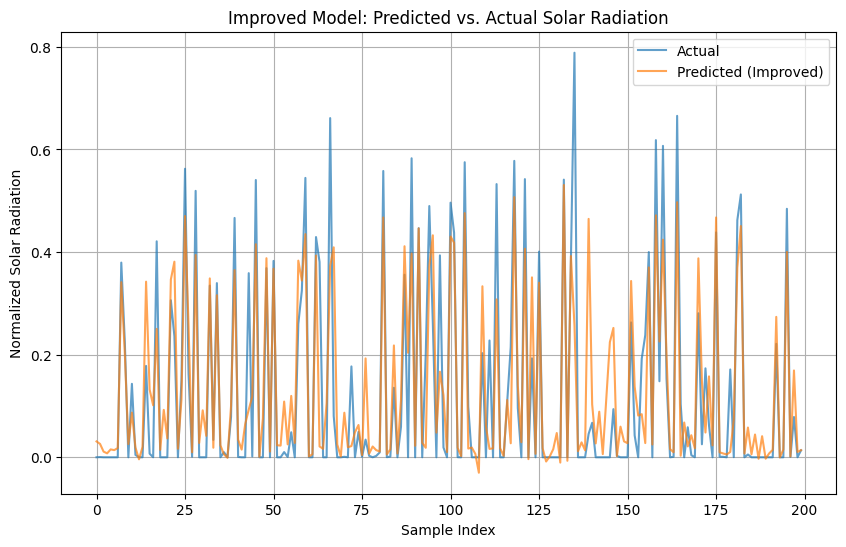

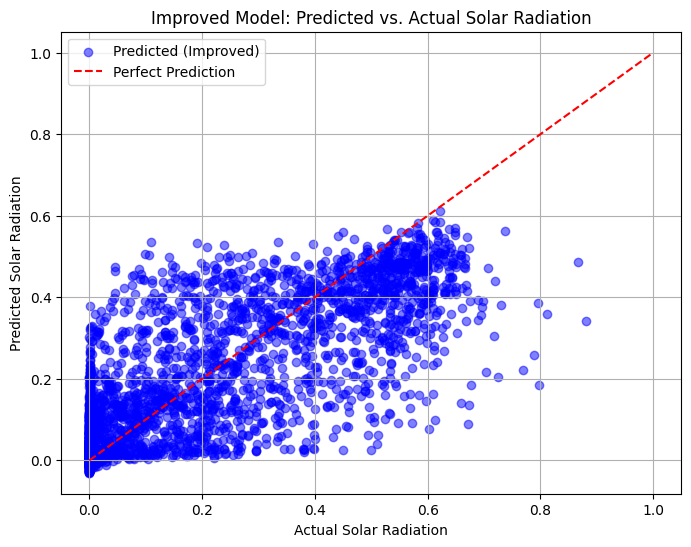

In [70]:
# Make predictions on the test set with the improved model
y_pred_improved = improved_model.predict(X_test)

# Reshape predictions and actual values if necessary
y_pred_improved = np.squeeze(y_pred_improved)  # Remove unnecessary dimensions
y_test = np.squeeze(y_test)

# Evaluate metrics again
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_improved = mean_absolute_error(y_test, y_pred_improved)
rmse_improved = np.sqrt(mean_squared_error(y_test, y_pred_improved))
r2_improved = r2_score(y_test, y_pred_improved)

print(f"Improved MAE: {mae_improved}")
print(f"Improved RMSE: {rmse_improved}")
print(f"Improved R-Squared: {r2_improved}")

# Plot predictions vs. actual values for the improved model
plt.figure(figsize=(10, 6))
plt.plot(y_test[:200], label='Actual', alpha=0.7)  # Limit to 200 samples for clarity
plt.plot(y_pred_improved[:200], label='Predicted (Improved)', alpha=0.7)
plt.title('Improved Model: Predicted vs. Actual Solar Radiation')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Solar Radiation')
plt.legend()
plt.grid()
plt.show()

# Scatter plot: Predicted vs. Actual for improved model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_improved, c='blue', alpha=0.5, label='Predicted (Improved)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Prediction')  # Perfect prediction line
plt.title('Improved Model: Predicted vs. Actual Solar Radiation')
plt.xlabel('Actual Solar Radiation')
plt.ylabel('Predicted Solar Radiation')
plt.legend()
plt.grid()
plt.show()


In [71]:
# Combine predictions from both models (average ensemble)
y_pred_ensemble = (y_pred + y_pred_improved) / 2

# Evaluate ensemble predictions
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"Ensemble MAE: {mae_ensemble}")
print(f"Ensemble RMSE: {rmse_ensemble}")
print(f"Ensemble R-Squared: {r2_ensemble}")


Ensemble MAE: 0.06669916173100707
Ensemble RMSE: 0.10807082087463184
Ensemble R-Squared: 0.7001332094431215


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape input data for LSTM (requires 3D input: samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train.values, axis=1)  # Adding time dimension
X_val_lstm = np.expand_dims(X_val.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)

# Define the LSTM model
lstm_model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(64, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the LSTM model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_lstm = lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the LSTM model on the test set
test_loss_lstm, test_mae_lstm = lstm_model.evaluate(X_test_lstm, y_test, verbose=1)
print(f"LSTM Test MAE: {test_mae_lstm}")


Epoch 1/100


C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


715/715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0235 - mae: 0.1069 - val_loss: 0.0149 - val_mae: 0.0829
Epoch 2/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0154 - mae: 0.0819 - val_loss: 0.0141 - val_mae: 0.0765
Epoch 3/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0139 - mae: 0.0765 - val_loss: 0.0133 - val_mae: 0.0779
Epoch 4/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0131 - mae: 0.0736 - val_loss: 0.0126 - val_mae: 0.0717
Epoch 5/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0134 - mae: 0.0735 - val_loss: 0.0129 - val_mae: 0.0737
Epoch 6/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0128 - mae: 0.0715 - val_loss: 0.0126 - val_mae: 0.0707
Epoch 7/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0126 - mae: 0.0703 - val_loss: 0.0126 - val_mae: 0.0661
Epoch 8/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0128 - mae: 0.0716 - val_loss: 0.0124 - val_mae: 0.0702
Epoch 9/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss:

In [73]:
from sklearn.model_selection import KFold

# Example for cross-validation
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]
    # Train and evaluate the model for each fold


In [74]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Reshape input data for LSTM (requires 3D input: samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train.values, axis=1)  # Adding time dimension
X_val_lstm = np.expand_dims(X_val.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)

# Define the LSTM model
lstm_model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(64, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the LSTM model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_lstm = lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the LSTM model on the test set
test_loss_lstm, test_mae_lstm = lstm_model.evaluate(X_test_lstm, y_test, verbose=1)
test_mae_lstm


C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0237 - mae: 0.1081 - val_loss: 0.0160 - val_mae: 0.0879
Epoch 2/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0150 - mae: 0.0801 - val_loss: 0.0141 - val_mae: 0.0729
Epoch 3/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0143 - mae: 0.0778 - val_loss: 0.0135 - val_mae: 0.0707
Epoch 4/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0134 - mae: 0.0747 - val_loss: 0.0128 - val_mae: 0.0707
Epoch 5/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0131 - mae: 0.0726 - val_loss: 0.0128 - val_mae: 0.0736
Epoch 6/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0129 - mae: 0.0722 - val_loss: 0.0126 - val_mae: 0.0669
Epoch 7/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0130 - mae: 0.0724 - val_loss: 0.0126 - val_mae: 0.0713
Epoch 8/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0129 - mae: 0.0715 - val_loss: 0.0127 - val_mae: 0.0669
Epoch 9/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/

0.06960681825876236

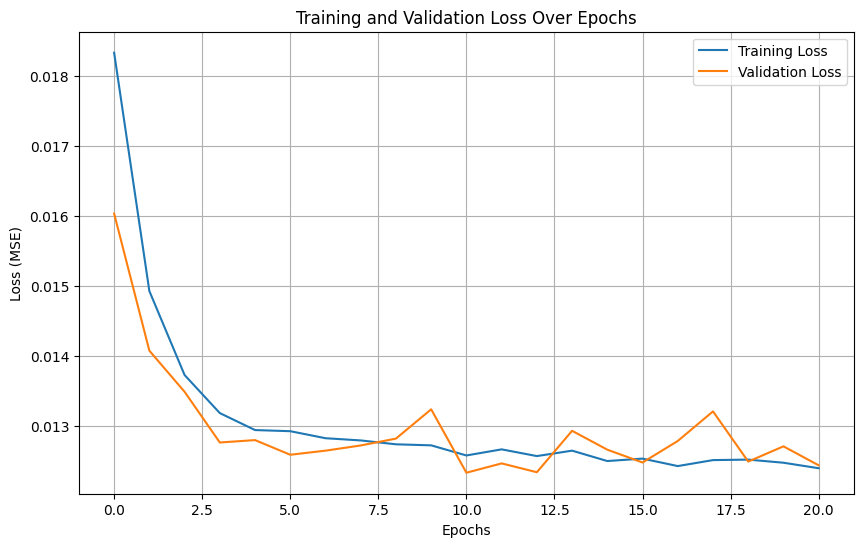

In [75]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step    


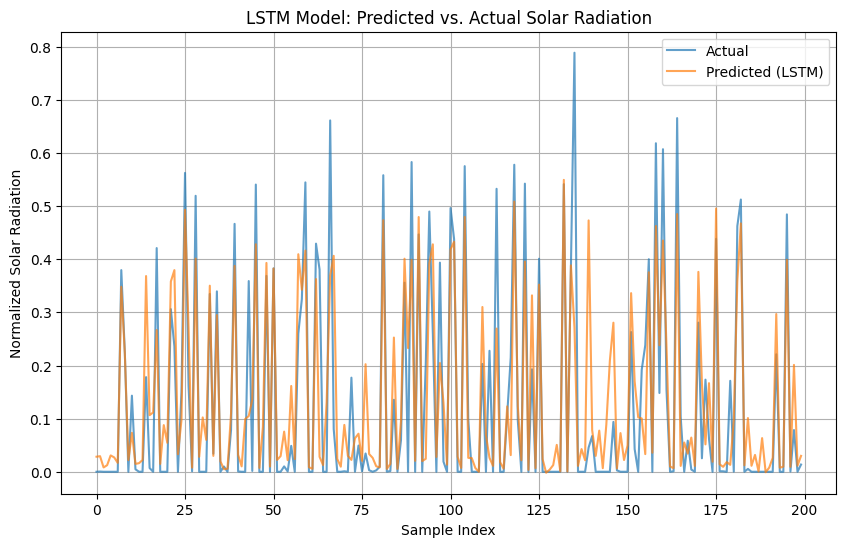

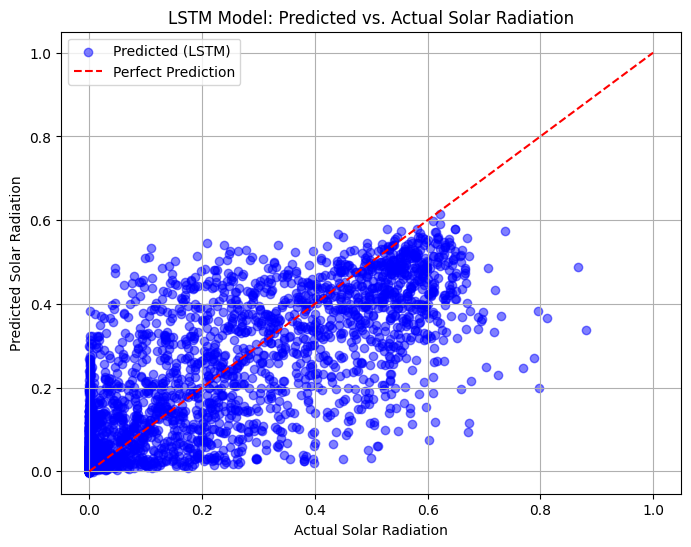

In [76]:
# Predict solar radiation using the test set
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test[:200].values, label='Actual', alpha=0.7)  # Limit to 200 samples for clarity
plt.plot(y_pred_lstm[:200], label='Predicted (LSTM)', alpha=0.7)
plt.title('LSTM Model: Predicted vs. Actual Solar Radiation')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Solar Radiation')
plt.legend()
plt.grid()
plt.show()

# Scatter plot: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lstm, c='blue', alpha=0.5, label='Predicted (LSTM)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Prediction')  # Perfect prediction line
plt.title('LSTM Model: Predicted vs. Actual Solar Radiation')
plt.xlabel('Actual Solar Radiation')
plt.ylabel('Predicted Solar Radiation')
plt.legend()
plt.grid()
plt.show()


In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Flatten arrays if needed
y_test_flat = np.squeeze(y_test)
y_pred_lstm_flat = np.squeeze(y_pred_lstm)

# Compute metrics
mae_lstm = mean_absolute_error(y_test_flat, y_pred_lstm_flat)
rmse_lstm = np.sqrt(mean_squared_error(y_test_flat, y_pred_lstm_flat))
r2_lstm = r2_score(y_test_flat, y_pred_lstm_flat)

print(f"LSTM Model Metrics:")
print(f"  - Mean Absolute Error (MAE): {mae_lstm}")
print(f"  - Root Mean Squared Error (RMSE): {rmse_lstm}")
print(f"  - R² Score: {r2_lstm}")


LSTM Model Metrics:
  - Mean Absolute Error (MAE): 0.06960684245445187
  - Root Mean Squared Error (RMSE): 0.1095784105184797
  - R² Score: 0.6917085616351812


Epoch 1/100


C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


715/715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0281 - mae: 0.1223 - val_loss: 0.0148 - val_mae: 0.0826
Epoch 2/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0152 - mae: 0.0805 - val_loss: 0.0139 - val_mae: 0.0669
Epoch 3/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0152 - mae: 0.0804 - val_loss: 0.0136 - val_mae: 0.0652
Epoch 4/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0145 - mae: 0.0769 - val_loss: 0.0129 - val_mae: 0.0702
Epoch 5/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0140 - mae: 0.0751 - val_loss: 0.0126 - val_mae: 0.0703
Epoch 6/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0143 - mae: 0.0762 - val_loss: 0.0129 - val_mae: 0.0687
Epoch 7/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0136 - mae: 0.0739 - val_loss: 0.0130 - val_mae: 0.0678
Epoch 8/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0138 - mae: 0.0739 - val_loss: 0.0125 - val_mae: 0.0721
Epoch 9/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss:

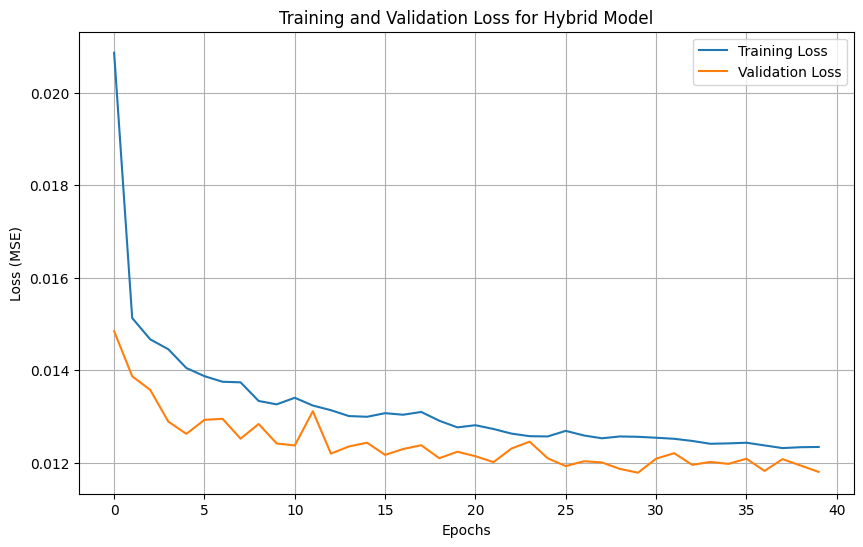

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   


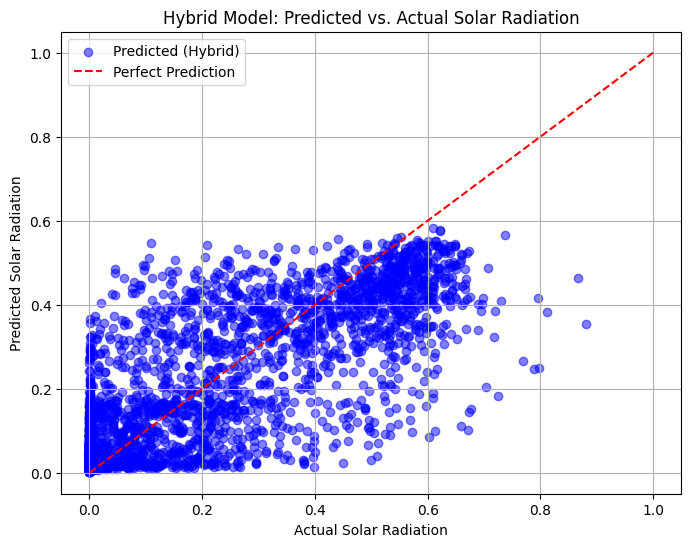

In [79]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

# Reshape input data for CNN + LSTM (requires 3D input: samples, timesteps, features)
X_train_hybrid = np.expand_dims(X_train.values, axis=2)  # Add channel dimension
X_val_hybrid = np.expand_dims(X_val.values, axis=2)
X_test_hybrid = np.expand_dims(X_test.values, axis=2)

# Define the Hybrid CNN + LSTM model
hybrid_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_hybrid.shape[1], X_train_hybrid.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    LSTM(128, activation='tanh', return_sequences=False),
    Dropout(0.2),
    
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile the Hybrid model
hybrid_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the Hybrid model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_hybrid = hybrid_model.fit(
    X_train_hybrid, y_train,
    validation_data=(X_val_hybrid, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the Hybrid model on the test set
test_loss_hybrid, test_mae_hybrid = hybrid_model.evaluate(X_test_hybrid, y_test, verbose=1)
print(f"Hybrid Model Test MAE: {test_mae_hybrid}")

# Save the Hybrid model
hybrid_model.save('hybrid_solar_radiation_model.keras')

# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history_hybrid.history['loss'], label='Training Loss')
plt.plot(history_hybrid.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Hybrid Model')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

# Make predictions on the test set
y_pred_hybrid = hybrid_model.predict(X_test_hybrid)

# Scatter plot: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_hybrid, c='blue', alpha=0.5, label='Predicted (Hybrid)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Prediction')  # Perfect prediction line
plt.title('Hybrid Model: Predicted vs. Actual Solar Radiation')
plt.xlabel('Actual Solar Radiation')
plt.ylabel('Predicted Solar Radiation')
plt.legend()
plt.grid()
plt.show()


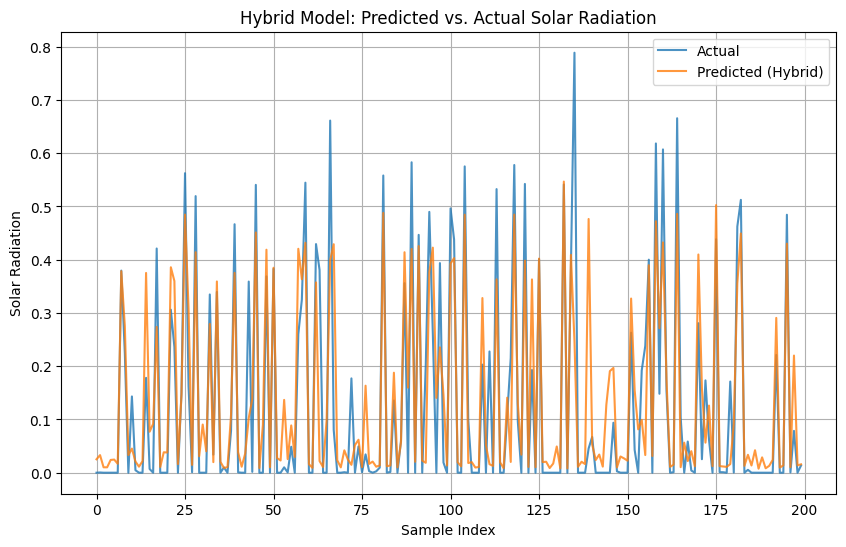

In [80]:
# Line plot: Predicted vs. Actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test[:200].values, label='Actual', alpha=0.8)  # Limit to 200 samples for clarity
plt.plot(y_pred_hybrid[:200], label='Predicted (Hybrid)', alpha=0.8)
plt.title('Hybrid Model: Predicted vs. Actual Solar Radiation')
plt.xlabel('Sample Index')
plt.ylabel('Solar Radiation')
plt.legend()
plt.grid()
plt.show()


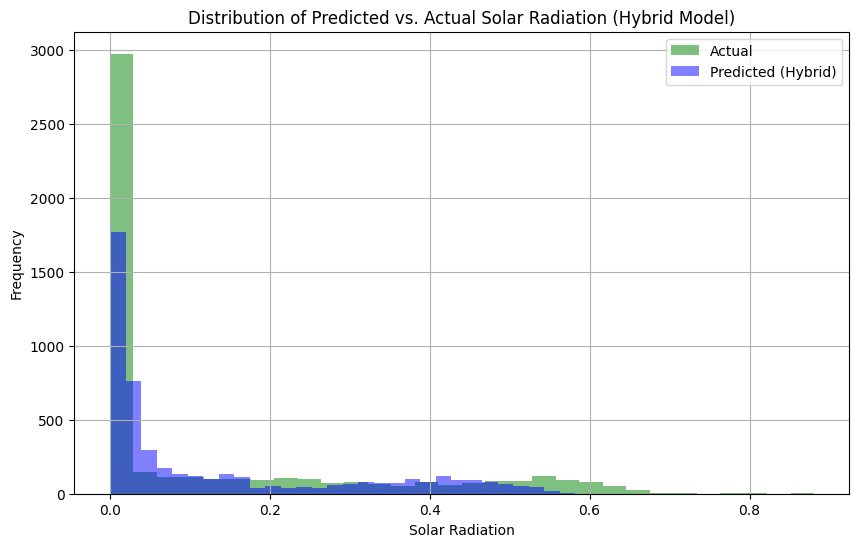

In [83]:
# Histogram: Distribution of Predicted vs. Actual values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual', color='green')
plt.hist(y_pred_hybrid, bins=30, alpha=0.5, label='Predicted (Hybrid)', color='blue')
plt.title('Distribution of Predicted vs. Actual Solar Radiation (Hybrid Model)')
plt.xlabel('Solar Radiation')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()
